<IPython.core.display.Javascript object>


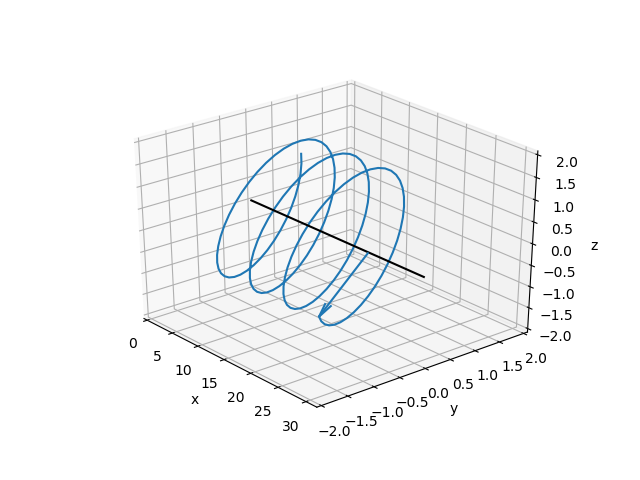

In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d

def update(i):
    global Ey, Ez, theta, fig, ax

    xx = np.arange(0, 10*np.pi, np.pi/20)
    n = i % len(xx)
    dth = theta * np.pi / 180
    
    x = xx[n]
    y = 0
    z = 0
    u = 0
    v = Ey * np.cos(x)
    w = Ez * np.cos(x - dth)
    l = np.sqrt(u**2 + v**2 + w**2)

    x2 = xx[0:n+1]
    y2 = Ey * np.cos(x2)
    z2 = Ez * np.cos(x2 - dth)

    plt.cla()
    ax.quiver(x, y, z, u, v, w, length=1, pivot='tail', arrow_length_ratio=0.2)
    ax.plot(x2, y2, z2)
    ax.plot(xx, np.zeros(len(xx)), np.zeros(len(xx)), 'k')
    ax.set_xlim(0, np.max(xx))
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    
if __name__ == '__main__':
    #
    # 必要に応じて変更するパラメータ
    #
    # Ey : 電界のy成分の振幅
    # Ez : 電界のz成分の振幅
    # theta : 電界のy成分とz成分の位相差，単位は度
    Ey = 1
    Ez = 1.5
    theta = -60

    # 描画の開始
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    elev = 30
    azim = -40
    ax.view_init(elev=elev, azim=azim)
    
    ani = animation.FuncAnimation(fig, update, interval=5)
